In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [ ]:
data_income = pd.read_csv("/content/income.csv")
data = data_income.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# DATA PREPROCESSING

In [ ]:
data.isnull().sum()


,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [ ]:
missing = data[data['SalStat'].isna()]

In [ ]:
missing



,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat


In [ ]:
data = data.dropna()
data


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [ ]:
data.isnull().sum()

,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [ ]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include = "O") #include o means include object data type

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [ ]:
data['JobType'].value_counts()

,count
JobType,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
?,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7


In [ ]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
?,1816
Transport-moving,1572


In [ ]:
columns = data.columns
for column in columns:
      print(data[column].value_counts())
      print("\n")

age
36    875
23    871
31    870
33    862
34    862
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64


EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64


maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absen

*** Occupation and Job Type has null values as '?'


In [ ]:
data = pd.read_csv('/content/income.csv', na_values=[' ?'])

In [ ]:
data.isnull().sum()

,0
age,0
JobType,1809
EdType,0
maritalstatus,0
occupation,1816
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [ ]:
missing = data[data.isnull().any(axis = 1)]

In [ ]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [ ]:
data['JobType'].isnull().sum()

np.int64(1809)

In [ ]:
data['occupation'].isnull().sum()

np.int64(1816)

In [ ]:
data2 = data.dropna(axis=0)

In [ ]:
data2.isnull().sum()

,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [ ]:
data2_numeric = data2.select_dtypes(exclude='O')
correlation = data2_numeric.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


None of the numerical columns are correlated

In [ ]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
gender__salStat_cp = pd.crosstab(index = data2['gender'], columns = data2['SalStat'], normalize='index')
gender__salStat_cp

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163


Men are more likely to earn more than 50000

#EXPLORATORY DATA ANALYSIS

<ipython-input-25-940e067cd5df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data2['SalStat'], palette='colorblind')


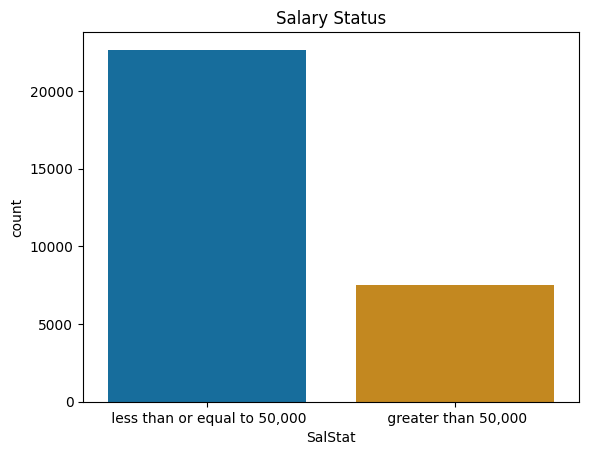

In [ ]:
sns.countplot(x = data2['SalStat'], palette='colorblind')
plt.title("Salary Status")
plt.show()

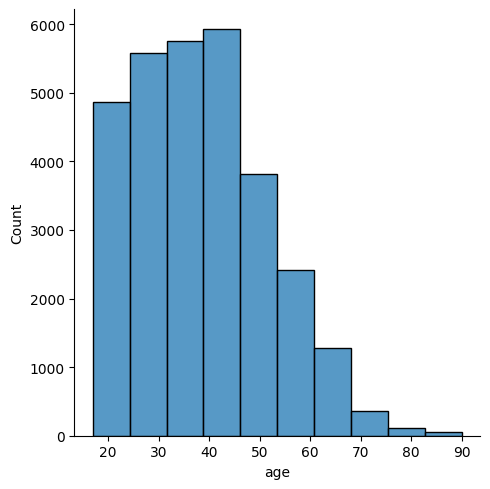

In [ ]:
sns.displot(data2['age'], bins = 10, kde=False)

,age
SalStat,
"greater than 50,000",43.0
"less than or equal to 50,000",34.0


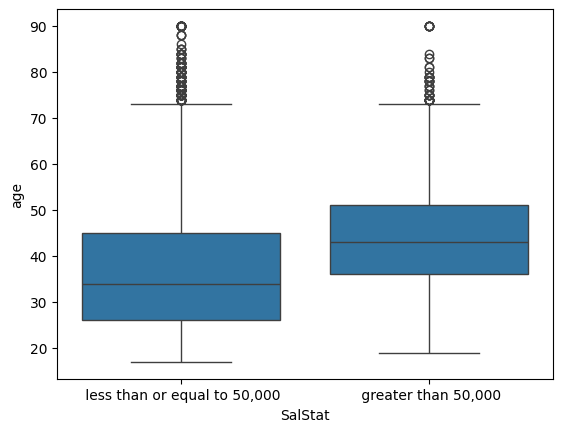

In [ ]:
sns.boxplot(x=data2['SalStat'], y=data2['age'])

data2.groupby('SalStat')['age'].median()



People with 35-50 are more likely to earn > 50000
People with 25 - 35 are more likely to earn <= 50000


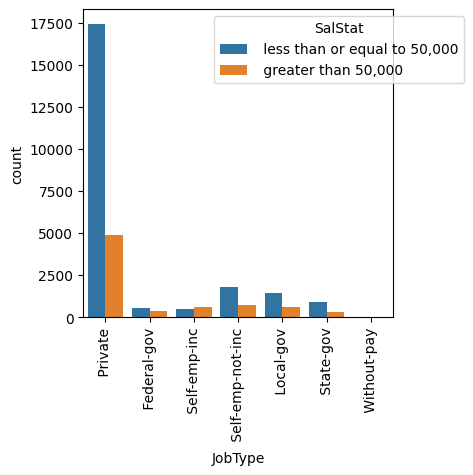

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x=data2['JobType'], hue = data2[ 'SalStat'])
plt.xticks(rotation=90)
plt.legend(title='SalStat', loc='upper left', bbox_to_anchor=(0.4, 1))

In [ ]:
pd.crosstab(index=data2['JobType'], columns = data2['SalStat'], normalize ='index')*100

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.706257,61.293743
Local-gov,29.462990,70.537010
Private,21.879207,78.120793
Self-emp-inc,55.865922,44.134078
Self-emp-not-inc,28.571429,71.428571
State-gov,26.896013,73.103987
Without-pay,0.000000,100.000000


From the above table it is clear that 56% of ***self employed*** people earn more than 50000 USD per year




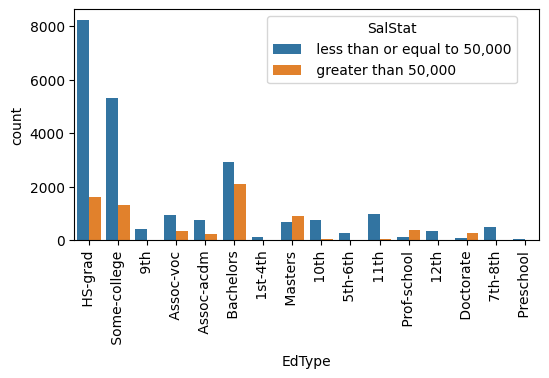

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x=data2['EdType'], hue = data2[ 'SalStat'])
plt.xticks(rotation=90)
plt.legend(title='SalStat', loc='upper left', bbox_to_anchor=(0.4, 1))

In [ ]:
pd.crosstab(index=data2['EdType'], columns = data2['SalStat'], normalize ='index')*100

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.195122,92.804878
11th,5.629771,94.370229
12th,7.692308,92.307692
1st-4th,3.973510,96.026490
5th-6th,4.166667,95.833333
7th-8th,6.283662,93.716338
9th,5.494505,94.505495
Assoc-acdm,25.396825,74.603175
Assoc-voc,26.319816,73.680184


 From above table people who have done Doctorate, Masters, prof-school are more likely to earn > 50000 USD per year when compared with others.


---
Hence an influencing variable in avoiding misuse of the subsidy


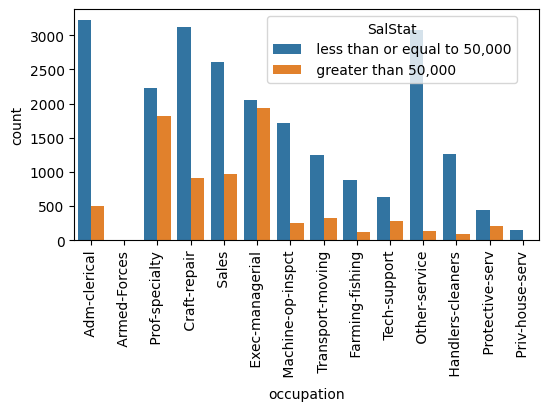

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x=data2['occupation'], hue = data2[ 'SalStat'])
plt.xticks(rotation=90)
plt.legend(title='SalStat', loc='upper left', bbox_to_anchor=(0.4, 1))

In [ ]:
pd.crosstab(index=data2['occupation'], columns = data2['SalStat'], normalize ='index')*100

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.383499,86.616501
Armed-Forces,11.111111,88.888889
Craft-repair,22.531017,77.468983
Exec-managerial,48.522044,51.477956
Farming-fishing,11.627907,88.372093
Handlers-cleaners,6.148148,93.851852
Machine-op-inspct,12.461851,87.538149
Other-service,4.109589,95.890411
Priv-house-serv,0.699301,99.300699


SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.383499,86.616501
Armed-Forces,11.111111,88.888889
Craft-repair,22.531017,77.468983
Exec-managerial,48.522044,51.477956
Farming-fishing,11.627907,88.372093
Handlers-cleaners,6.148148,93.851852
Machine-op-inspct,12.461851,87.538149
Other-service,4.109589,95.890411
Priv-house-serv,0.699301,99.300699


 Those who make more than 50000 USD per year are more likely to work as managers and professionals.
Hence it is an important variable in avoiding the misuse of subsidies

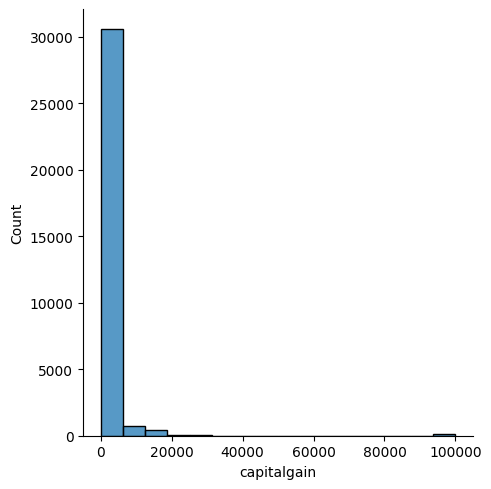

In [ ]:
sns.displot(x=data['capitalgain']);

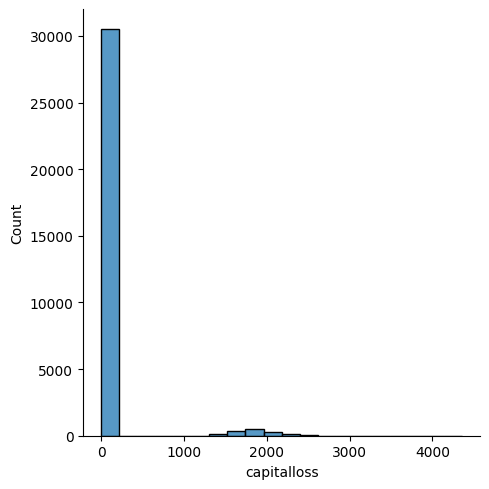

In [ ]:
sns.displot(x=data['capitalloss']);

<Axes: xlabel='SalStat', ylabel='hoursperweek'>

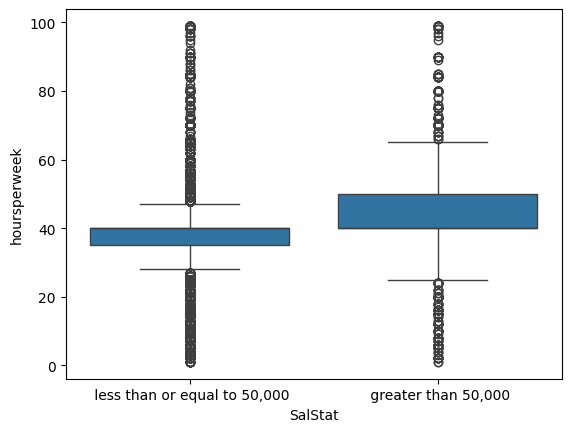

In [ ]:
sns.boxplot(y=data['hoursperweek'], x= data['SalStat'])

From the plot it is clear that those who make > 50000 per year are more likely to work 40-50 hrs per week.
So we can say it may be an important variable .

# LOGISTIC REGRESSION

In [ ]:
data2['SalStat'] = data['SalStat']
data2
data2.loc[:, 'SalStat'] = data2['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})


<ipython-input-28-5f448d443e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data['SalStat']


In [ ]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [ ]:
new_data = pd.get_dummies(data2, drop_first=True)
new_data = new_data.astype(int)

In [ ]:
new_data

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,SalStat_1
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31974,34,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31975,23,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31976,42,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
columns_list = list(new_data.columns)
columns_list




['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty

In [ ]:
features = list(set(columns_list)-set(['SalStat_1']))
features


['nativecountry_ Yugoslavia',
 'nativecountry_ Taiwan',
 'nativecountry_ Haiti',
 'age',
 'nativecountry_ Philippines',
 'nativecountry_ India',
 'JobType_ Local-gov',
 'nativecountry_ Canada',
 'relationship_ Unmarried',
 'nativecountry_ England',
 'nativecountry_ Honduras',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Preschool',
 'nativecountry_ South',
 'capitalloss',
 'nativecountry_ Cuba',
 'occupation_ Machine-op-inspct',
 'nativecountry_ France',
 'nativecountry_ Poland',
 'EdType_ Some-college',
 'maritalstatus_ Never-married',
 'hoursperweek',
 'nativecountry_ Portugal',
 'nativecountry_ Guatemala',
 'relationship_ Own-child',
 'capitalgain',
 'JobType_ Self-emp-inc',
 'occupation_ Exec-managerial',
 'nativecountry_ Columbia',
 'JobType_ Without-pay',
 'occupation_ Transport-moving',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Craft-repair',
 'nativecountry_ Hong',
 'EdType_ 7th-8th',
 'EdType_ 12th',
 'maritalstatus_ Separated',
 'nativecountry_ Japan',
 'occupati

## TRAINING MODEL

In [ ]:
y=new_data['SalStat_1'].values

y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
logistic.coef_
logistic.intercept_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.03918566])

## TESTING MODEL & EVALUATING MODEL

In [ ]:
prediction = logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix

In [ ]:
cm = confusion_matrix(test_y,prediction)
cm

array([[6295,  528],
       [ 954, 1272]])

In [ ]:
accuracy = accuracy_score(test_y, prediction)
accuracy


0.8362249972372637

In [ ]:
misclassified = (test_y != prediction).sum()
misclassified

np.int64(1482)

Less Accuracy

#Rebuilding Model By Removing Insignificant columns

In [ ]:
data2['SalStat']=data['SalStat']
data2
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

<ipython-input-57-fc05c7f600ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data['SalStat']
<ipython-input-57-fc05c7f600ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [ ]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [ ]:
 cols = ['gender', 'race', 'nativecountry', 'race', 'JobType']
 new_data = data2.drop(cols, axis =1)

In [ ]:
new_data

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
...,...,...,...,...,...,...,...,...,...
31973,34,HS-grad,Never-married,Farming-fishing,Not-in-family,594,0,60,0
31974,34,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
31975,23,Some-college,Married-civ-spouse,Adm-clerical,Husband,0,0,40,0
31976,42,Some-college,Married-civ-spouse,Adm-clerical,Wife,0,0,40,0


In [ ]:
new_data = pd.get_dummies(new_data, drop_first=True)
new_data = new_data.astype(int)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
columns_list = list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ N

In [ ]:
features = list(set(columns_list)-set(['SalStat']))
features

['age',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'maritalstatus_ Widowed',
 'relationship_ Unmarried',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Preschool',
 'relationship_ Wife',
 'capitalloss',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Machine-op-inspct',
 'EdType_ Some-college',
 'EdType_ Masters',
 'hoursperweek',
 'maritalstatus_ Never-married',
 'occupation_ Armed-Forces',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'relationship_ Own-child',
 'capitalgain',
 'occupation_ Exec-managerial',
 'EdType_ 5th-6th',
 'occupation_ Other-service',
 'occupation_ Transport-moving',
 'maritalstatus_ Married-AF-spouse',
 'occupation_ Craft-repair',
 'EdType_ 7th-8th',
 'EdType_ 12th',
 'maritalstatus_ Separated',
 'occupation_ Sales',
 'EdType_ Bachelors',
 'occupation_ Handlers-cleaners',
 'maritalstatus_ Married-civ-spouse',
 'occupation_ Protective-serv',
 'EdType_ 1st-4th',
 'relationship_ Not-in-family',
 'occupation_ Tech-support',
 'relationshi

In [ ]:
y=new_data['SalStat'].values

y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x= new_data[features].values
x

array([[45,  0,  1, ...,  0,  0,  0],
       [24,  0,  1, ...,  0,  0,  0],
       [44,  0,  0, ...,  0,  0,  0],
       ...,
       [23,  0,  0, ...,  0,  0,  0],
       [42,  0,  0, ...,  0,  0,  0],
       [29,  0,  0, ...,  0,  0,  0]])

In [ ]:
train_x, test_x, train_y, text_y = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
logistic.coef_
logistic.intercept_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.98883083])

In [ ]:
prediction=logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cm = confusion_matrix(test_y, prediction)
cm

array([[6215,  608],
       [ 880, 1346]])

In [ ]:
accuracy = accuracy_score(test_y, prediction)
accuracy

0.8355619405459167

Same Accuracy As Previous one

#Building KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
prediction = KNN_classifier.predict(test_x)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
cm = confusion_matrix(test_y, prediction)
cm

array([[6209,  614],
       [ 862, 1364]])

In [ ]:
accuracy = accuracy_score(test_y, prediction)
accuracy

0.8368880539286109

In [ ]:
for i in range(1, 20, 2):
  KNN_classifier = KNeighborsClassifier(n_neighbors=i)
  KNN_classifier.fit(train_x,train_y)
  prediction = KNN_classifier.predict(test_x)
  print(f"{i}",accuracy_score(test_y, prediction))

1 0.8093712012377058
3 0.8290418830810035
5 0.8368880539286109
7 0.8373300917228423
9 0.841308431870925
11 0.8402033373853465
13 0.8398718090396728
15 0.8430765830478506
17 0.8429660735992928
19 0.843518620842082
